In [123]:
import pandas as pd
data = pd.read_csv("multivariateData.dat",header=None,names=['Size','Bedrooms','Price'])

In [124]:
# rescaling data
data = (data - data.mean()) / data.std()
print(data.head(5))

       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


In [125]:
# add ones column
data.insert(0,'X0',1)

In [126]:
print(data.head(5))

   X0      Size  Bedrooms     Price
0   1  0.130010 -0.223675  0.475747
1   1 -0.504190 -0.223675 -0.084074
2   1  0.502476 -0.223675  0.228626
3   1 -0.735723 -1.537767 -0.867025
4   1  1.257476  1.090417  1.595389


In [127]:
print(data.shape)

(47, 4)


In [128]:
#split train & test data
train = pd.DataFrame()
test = pd.DataFrame()
train_size =int(0.9 * len(data)) 
train=train.append(data.iloc[0:train_size,:])
test=test.append(data.iloc[train_size:len(data),:])
#print(train)
#print(test)

In [129]:
#separate X (train data) from Y (target)
x=train.iloc[:,0:3] #features
y=train.iloc[:,3:4] #target



In [130]:
#convert to matrices and initialize theta
import numpy as np
x=np.matrix(x.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0,0]))

In [131]:
#cost function
def computeCost(x, y, theta):
    z=np.power(((x * theta.T)-y),2)
    return np.sum(z)/(2 * len(x))

print(computeCost(x,y,theta))

0.5171610919914761


In [146]:
# gradient Descent
def gradientDescent(x, y, theta, learning_rate, iterations):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iterations)
    
    for i in range(iterations):
        error=(x * theta.T) - y
        for j in range(parameters):
            term=np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j] - ((learning_rate/len(x)) * np.sum(term))
            
        theta=temp
        cost[i]=computeCost(x, y, theta)
        
    return theta, cost

g, cost=gradientDescent(x,y,theta,0.1,100)
print('g=',g)
#print('cost=',cost)
print('final_cost=',computeCost(x,y,g))

g= [[ 0.00799954  0.89631267 -0.03361089]]
final_cost= 0.1346943257176616


Text(0.5, 1.0, 'Size vs. Price')

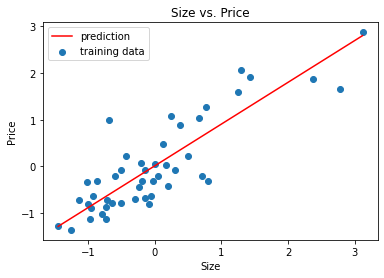

In [152]:
#get best fit line for size vs. price
import matplotlib.pyplot as plt
x_axis=np.linspace(data.Size.min(), data.Size.max(), 100)
h=g[0,0] + (g[0,1]*x_axis) #prediction
fig, ax=plt.subplots()
ax.plot(x_axis, h, 'r', label='prediction')
ax.scatter(data.Size, data.Price, label='training data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

Text(0, 0.5, 'Cost')

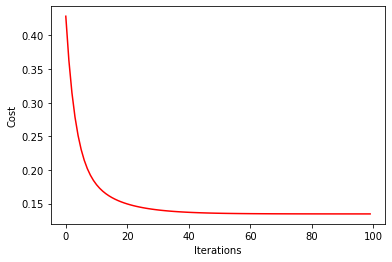

In [159]:
# draw error graph
fig, ax=plt.subplots()
ax.plot(np.arange(100), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')